## Load functions

In [1]:
import struct
import numpy as np
import re

elements={"h": 1, "he": 2, "li": 3, "be": 4, "b": 5, "c": 6, "n": 7, "o": 8, "f": 9, "ne": 10, "na": 11, "mg": 12, "al": 13, 
"si": 14, "p": 15, "s": 16, "cl": 17, "ar": 18, "k": 19, "ca": 20, "sc": 21, "ti": 22, "v": 23, "cr": 24, "mn": 25, "fe": 26,
 "co": 27, "ni": 28, "cu": 29, "zn": 30, "ga": 31, "ge": 32, "as": 33, "se": 34, "br": 35, "kr": 36, "rb": 37, "sr": 38, "y": 39,
  "zr": 40, "nb": 41, "mo": 42, "tc": 43, "ru": 44, "rh": 45, "pd": 46, "ag": 47, "cd": 48, "in": 49, "sn": 50, "sb": 51, "te": 52,
   "i": 53, "xe": 54, "cs": 55, "ba": 56, "la": 57, "ce": 58, "pr": 59, "nd": 60, "pm": 61, "sm": 62, "eu": 63, "gd": 64, "tb": 65,
    "dy": 66, "ho": 67, "er": 68, "tm": 69, "yb": 70, "lu": 71, "hf": 72, "ta": 73, "w": 74, "re": 75, "os": 76, "ir": 77, "pt": 78,
     "au": 79, "hg": 80, "tl": 81, "pb": 82, "bi": 83, "po": 84, "at": 85, "rn": 86, "fr": 87, "ra": 88, "ac": 89, "th": 90, "pa": 91,
      "u": 92, "np": 93, "pu": 94, "am": 95, "cm": 96, "bk": 97, "cf": 98, "es": 99, "fm": 100, "md": 101, "no": 102, "lr": 103, "rf": 104,
       "db": 105, "sg": 106, "bh": 107, "hs": 108, "mt": 109, "ds": 110, "rg": 111, "cn": 112, "nh": 113, "fl": 114, "mc": 115, "lv": 116, "ts": 117, "og": 118,
       "al-":119, "al*": 120}

def getnamebyz(z):
	keys=elements.keys()
	values=elements.values()
	return keys[values.index(z)]

def getZ(input):
	if (input==""):
		return -8888
	else:
		sep=re.split('(\d+)',input)
		if len(sep)==1:
			if sep[0]=="n":
				return int(0)
			elif (sep[0]=="p" or sep[0]=="d" or sep[0]=="t"):
				return int(1)			
			else:
				print "Something wrong! ",input
		else:
			return int(elements[sep[0]])

def getA(input):
	if (input==""):
		return -9999
	else:
		sep=re.split('(\d+)',input)
		if len(sep)==1:
			if sep[0]=="n":
				return 1
			elif sep[0]=="p":
				return 1
			elif sep[0]=="d":
				return 2
			elif sep[0]=="t":
				return 3
			else:
				print "Something wrong! ",input
		else:
			return int(sep[1])


def load_txt(infile):
	n_lines = sum(1 for line in open(infile))
	file1 = open(infile);
	count = 0
	reaclib=[]
	while True:
			count+=1
			line1 = file1.readline()
			line2 = file1.readline()
			line3 = file1.readline()
			line4 = file1.readline()
			#break
			if (not line1 or not line2 or not line3 or not line4):
				break
			#line1
			chap = int(line1)
			#line2
			(empty1,nuc1,nuc2,nuc3,nuc4,nuc5,nuc6,empty2,label,rtype,rev_f,emtpy3,Qval,emtpy4) = struct.unpack("5s5s5s5s5s5s5s8s4s1s1s3s12s10sx",line2)
			#strip spaces all
			(empty1,nuc1,nuc2,nuc3,nuc4,nuc5,nuc6,empty2,label,rtype,rev_f,emtpy3,Qval,emtpy4) = map(lambda x: x.strip(),(empty1,nuc1,nuc2,nuc3,nuc4,nuc5,nuc6,empty2,label,rtype,rev_f,emtpy3,Qval,emtpy4))
			# get A and Z
			(nuc1_z,nuc2_z,nuc3_z,nuc4_z,nuc5_z,nuc6_z)=map(lambda x: getZ(x),(nuc1,nuc2,nuc3,nuc4,nuc5,nuc6));
			(nuc1_a,nuc2_a,nuc3_a,nuc4_a,nuc5_a,nuc6_a)=map(lambda x: getA(x),(nuc1,nuc2,nuc3,nuc4,nuc5,nuc6));
			#values
			Qval=float(Qval.strip())
			#line3
			(a0,a1,a2,a3,empty1) = struct.unpack("13s13s13s13s22sx",line3)
			(a0,a1,a2,a3) = map(float,(a0,a1,a2,a3))
			#line4
			(a4,a5,a6,empty1) = struct.unpack("13s13s13s35sx",line4)
			(a4,a5,a6) = map(float,(a4,a5,a6))
			reaclib.append({"chap":chap,"nuc":[nuc1,nuc2,nuc3,nuc4,nuc5,nuc6],"nucA":[nuc1_a,nuc2_a,nuc3_a,nuc4_a,nuc5_a,nuc6_a],"nucZ":[nuc1_z,nuc2_z,nuc3_z,nuc4_z,nuc5_z,nuc6_z],"label":label,"rtype":rtype,"reverse":rev_f,
				"Qval":Qval,"rate":[a0,a1,a2,a3,a4,a5,a6]})
	if n_lines!=count*4-4:
		print "Can not read all content!"
	#else:
		#print "Read",len(reaclib),"entries!"
	return reaclib

def load_bin(infile):
	return np.load(infile,allow_pickle='TRUE')

def dump_txt(reaclib):
	for index in range(len(reaclib)):
		print("{0:d}".format(reaclib[index]["chap"]))
		tmp="{:>5s}{:>5s}{:>5s}{:>5s}{:>5s}{:>5s}{:>5s}{:>8s}{:>4s}{:>1s}{:>1s}{:>3s}{:>12.5e}{:>10s}".format("",reaclib[index]["nuc"][0],reaclib[index]["nuc"][1],reaclib[index]["nuc"][2],reaclib[index]["nuc"][3],
			reaclib[index]["nuc"][4],reaclib[index]["nuc"][5],"",reaclib[index]["label"],reaclib[index]["rtype"],reaclib[index]["reverse"],"",reaclib[index]["Qval"],"")
		#print replacesign(tmp,52)
		print tmp
		tmp="{:>13.6e}{:>13.6e}{:>13.6e}{:>13.6e}{:>22s}".format(reaclib[index]["rate"][0],reaclib[index]["rate"][1],reaclib[index]["rate"][2],reaclib[index]["rate"][3],"")
		print tmp
		tmp="{:>13.6e}{:>13.6e}{:>13.6e}{:>35s}".format(reaclib[index]["rate"][4],reaclib[index]["rate"][5],reaclib[index]["rate"][6],"")
		print tmp
		
def dump_bin(reaclib,outfile):
	np.save(outfile,reaclib)

def convert(infile,outfile):
	reaclib=load_txt(infile)
	dump(reaclib,outfile)


## Plotting

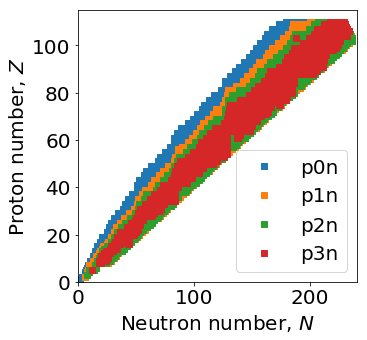

In [6]:

infile = "results02090719.txt"
import matplotlib.pyplot as plt

reaclib = load_txt(infile)

res0n = filter(lambda cond: (cond["rtype"]=="w" and cond["nucA"][0]==cond["nucA"][1] and cond["nucZ"][0]==cond["nucZ"][1]-1 and cond["chap"] == 1),reaclib)
res1n = filter(lambda cond: (cond["rtype"]=="w" and cond["nucA"][0]==cond["nucA"][2]+1 and cond["nucZ"][0]==cond["nucZ"][2]-1 and cond["chap"] == 2),reaclib)
res2n = filter(lambda cond: (cond["rtype"]=="w" and cond["nucA"][0]==cond["nucA"][3]+2 and cond["nucZ"][0]==cond["nucZ"][3]-1 and cond["chap"] == 3),reaclib)
res3n = filter(lambda cond: (cond["rtype"]=="w" and cond["nucA"][0]==cond["nucA"][4]+3 and cond["nucZ"][0]==cond["nucZ"][4]-1 and cond["chap"] == 11),reaclib)

resall = filter(lambda cond: ((cond["rtype"]=="w" and cond["nucA"][0]==cond["nucA"][4]+3 and cond["nucZ"][0]==cond["nucZ"][4]-1 and cond["chap"] == 11) or \
	(cond["rtype"]=="w" and cond["nucA"][0]==cond["nucA"][3]+2 and cond["nucZ"][0]==cond["nucZ"][3]-1 and cond["chap"] == 3) or \
	(cond["rtype"]=="w" and cond["nucA"][0]==cond["nucA"][2]+1 and cond["nucZ"][0]==cond["nucZ"][2]-1 and cond["chap"] == 2) or \
	(cond["rtype"]=="w" and cond["nucA"][0]==cond["nucA"][1] and cond["nucZ"][0]==cond["nucZ"][1]-1 and cond["chap"] == 1)),reaclib)
 

n_0n = []; z_0n = [] 
for index in range(len(res0n)):
	z_0n.append(res0n[index]["nucZ"][0])
	n_0n.append(res0n[index]["nucA"][0]-res0n[index]["nucZ"][0])
	#print res0n[index]["nuc"][0],res0n[index]["nuc"][1]

n_1n = []; z_1n = [] 
for index in range(len(res1n)):
	z_1n.append(res1n[index]["nucZ"][0])
	n_1n.append(res1n[index]["nucA"][0]-res1n[index]["nucZ"][0])
	#print res1n[index]["nuc"][0],res1n[index]["nuc"][1],res1n[index]["nuc"][2]

n_2n = []; z_2n = [] 
for index in range(len(res2n)):
	z_2n.append(res2n[index]["nucZ"][0])
	n_2n.append(res2n[index]["nucA"][0]-res2n[index]["nucZ"][0])
	#print res2n[index]["nuc"][0],res2n[index]["nuc"][1],res2n[index]["nuc"][2],res2n[index]["nuc"][3]

n_3n = []; z_3n = [] 
for index in range(len(res3n)):
	z_3n.append(res3n[index]["nucZ"][0])
	n_3n.append(res3n[index]["nucA"][0]-res3n[index]["nucZ"][0])
	#print res3n[index]["nuc"][0],res3n[index]["nuc"][1],res3n[index]["nuc"][2],res3n[index]["nuc"][3],res3n[index]["nuc"][4]


#for index in range(len(resall)):
	#print resall[index]["label"],resall[index]["nuc"][0],resall[index]["nuc"][1],resall[index]["nuc"][2],resall[index]["nuc"][3],resall[index]["nuc"][4]

x1 = 0; x2 = 240
y1 = 0; y2 = 115

plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["font.size"] = 20

plt.xlim(x1,x2)
plt.ylim(y1,y2)

plt.xlabel('Neutron number, $N$')
plt.ylabel('Proton number, $Z$')

plt.plot(n_0n, z_0n, 's', markersize = 6, label = "p0n")
plt.plot(n_1n, z_1n, 's', markersize = 6, label = "p1n")
plt.plot(n_2n, z_2n, 's', markersize = 6, label = "p2n")
plt.plot(n_3n, z_3n, 's', markersize = 6, label = "p3n")


plt.legend()

plt.show()